In [1]:

import numpy as np 
import pandas as pd
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# contents

* [stores](#stores)
* [items](#items)
* [transactions](#transactions)
* [oil](#4)
* [holidays_events](#5)
* [train](#6)






In [5]:
df_test = pd.read_csv("test.csv")
df_sub = pd.read_csv("sample_submission.csv")
df_stores = pd.read_csv("stores.csv")
df_items = pd.read_csv("items.csv")
df_transactions = pd.read_csv("transactions.csv", parse_dates=['date'])
df_oil = pd.read_csv("oil.csv", parse_dates=['date'])
df_holiday = pd.read_csv("holidays_events.csv", parse_dates=['date'])
# the full training data's output: "125,497,040 rows | 6 columns"
#Therefore I will only load approx 5% of the data just to get a rough idea of what is in store for us.
import random
random.seed(4321)
df_train = pd.read_csv("train.csv",  parse_dates=['date'],
                    skiprows=lambda x: x > 0 and random.random() >=0.05  )

/var/folders/gq/789ffg0j3_s7scj27n_mdkj40000gn/T/ipykernel_50489/1981252024.py:12: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv",  parse_dates=['date'],


<div class="alert alert-block alert-info">
<b>Comment:</b> the full training data's output: "125,497,040 rows | 6 columns"
#Therefore I will only load approx 5% of the data just to get a rough idea of what is in store for us.
</div>

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [7]:
x=df_train.merge(df_stores, left_on='store_nbr', right_on='store_nbr',
                 how='left' )
x.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,city,state,type,cluster
0,6,2013-01-01,25,108797,1.00,NaN,Salinas,Santa Elena,D,1
1,50,2013-01-01,25,172343,1.00,NaN,Salinas,Santa Elena,D,1
2,87,2013-01-01,25,262358,1.00,NaN,Salinas,Santa Elena,D,1
3,93,2013-01-01,25,268440,1.00,NaN,Salinas,Santa Elena,D,1
4,99,2013-01-01,25,275823,1.00,NaN,Salinas,Santa Elena,D,1


  ## 1-stores  <a class="anchor"  id="stores"></a>


In [8]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


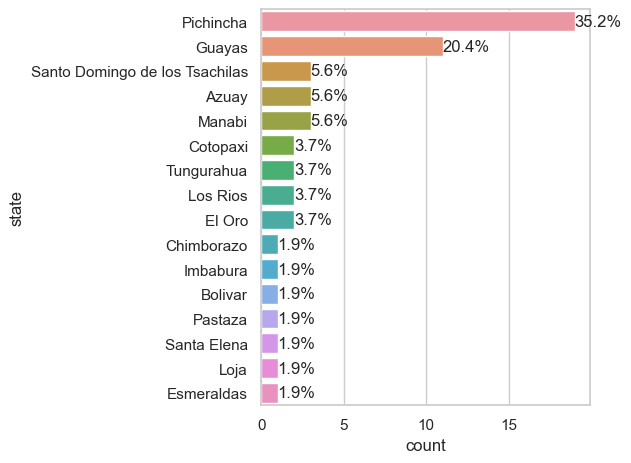

In [11]:
def show_countplot(df, colName: str):
    sns.set_theme(style="whitegrid")
    val = df[colName].value_counts().sort_values(ascending=False)

    ax = sns.countplot(df, y=colName 
                       , order=val.index
                       )

    summ = val.sum()

    title = val.index
    lbls = [f'{p[0] * 100 / summ:.1f}%' for p in zip(val)]
    
    #vetical label
    ax.bar_label(container=ax.containers[0], labels=lbls)
    # hor label
    # for p, label in zip(ax.patches, lbls):
    #     ax.annotate(label, (p.get_x(), p.get_height() + 0.15))
    
   

    plt.tight_layout()
    plt.show()


show_countplot(df_stores, "state")




Pichancha is the state that has the most stores



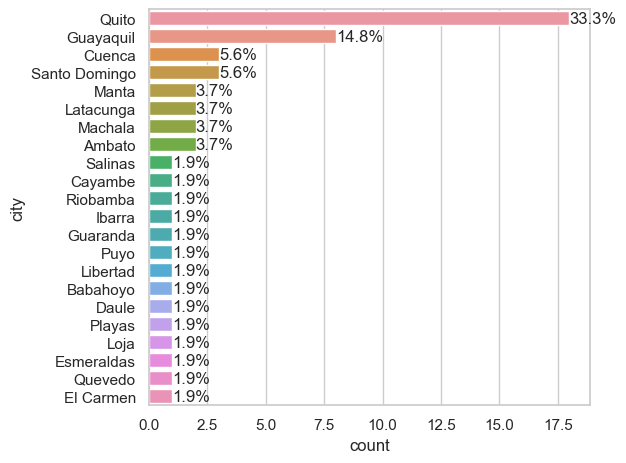

In [12]:
show_countplot(df_stores, "city")


Quito is the city that has the most stores

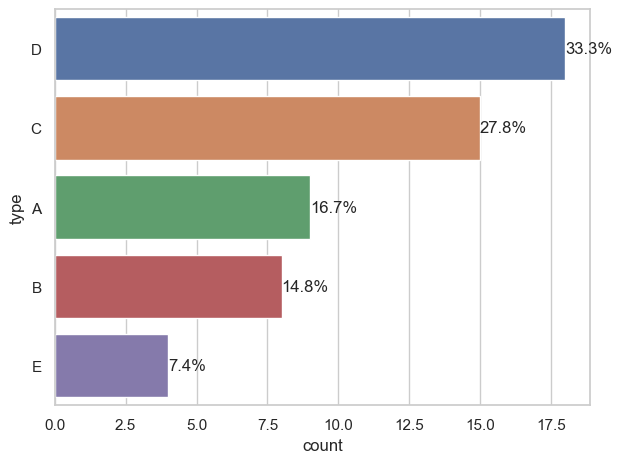

In [13]:
show_countplot(df_stores, "type")


the most stores are D type 

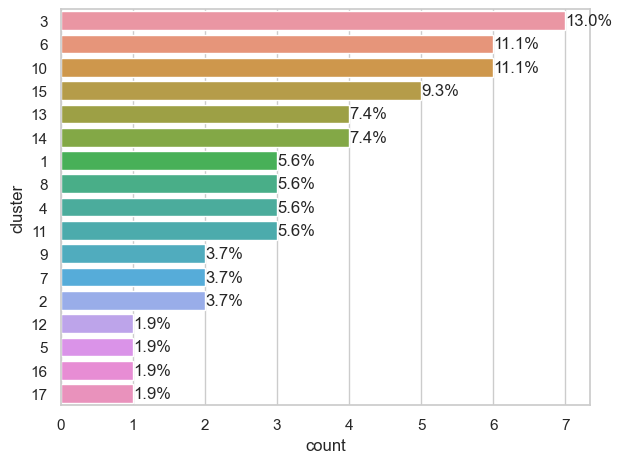

In [14]:
show_countplot(df_stores, "cluster")

cluster 3 has the most stores

  ## 2-items  <a class="anchor"  id="items"></a>


In [15]:
# df_items.info()
df_items.head()
# df_items["class"].value_counts()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


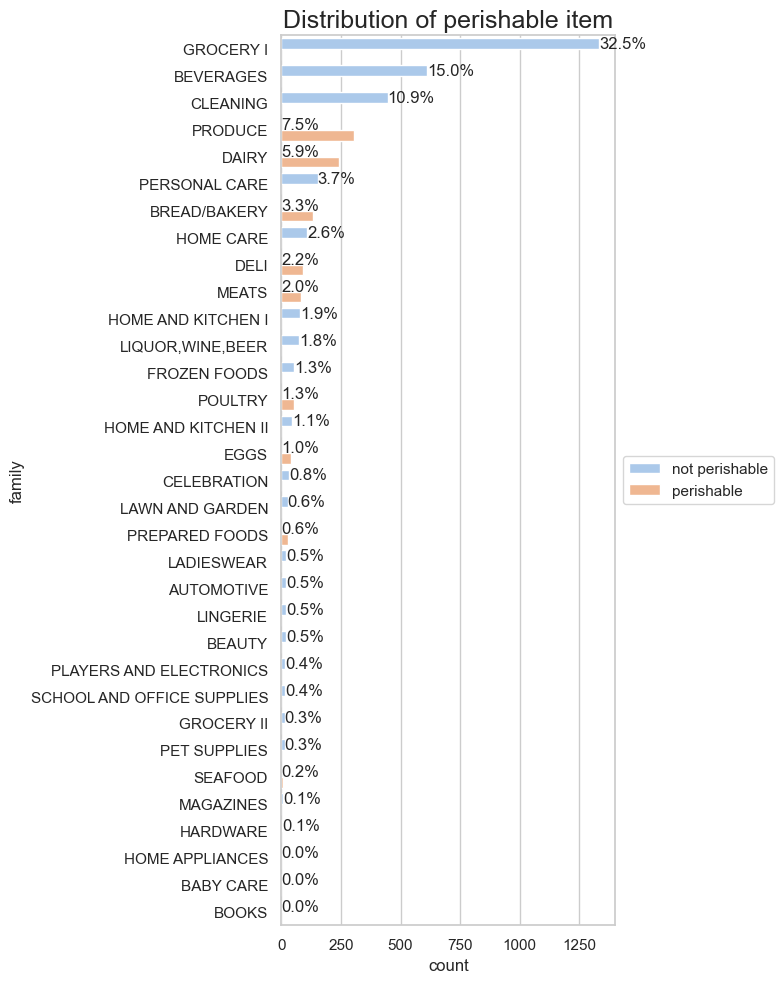

In [17]:
colName="family"

sns.set_theme(style="whitegrid")
val = df_items[colName].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 10))

ax = sns.countplot(df_items, y=colName # or y
                   , palette="pastel"
                   ,hue ="perishable"
                   , order=val.index
                   )
plt.rcParams["figure.figsize"] = (20,25)
summ = val.sum()

title = val.index
lbls = [f'{p[0] * 100 / summ:.1f}%' for p in zip(val)]

#vetical label
ax.bar_label(container=ax.containers[0], labels=lbls)

plt.legend(["not perishable", "perishable"],loc='center left', bbox_to_anchor=(1, 0.5))#out
plt.title("Distribution of perishable item",
          fontsize = 18)
plt.tight_layout()
plt.show()



the most transactions come from the family: grocery I


  ## 3-transactions  <a class="anchor"  id="transactions"></a>

In [18]:
df_transactions["year"]=df_transactions['date']. dt.year
df_transactions["month"]=df_transactions['date']. dt. month
#format YYYY-MM
df_transactions["year-month"]=df_transactions['date'].dt.strftime('%Y-%m')
# df_transactions.head()
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
 3   year          83488 non-null  int64         
 4   month         83488 non-null  int64         
 5   year-month    83488 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.8+ MB


<Figure size 800x1000 with 0 Axes>

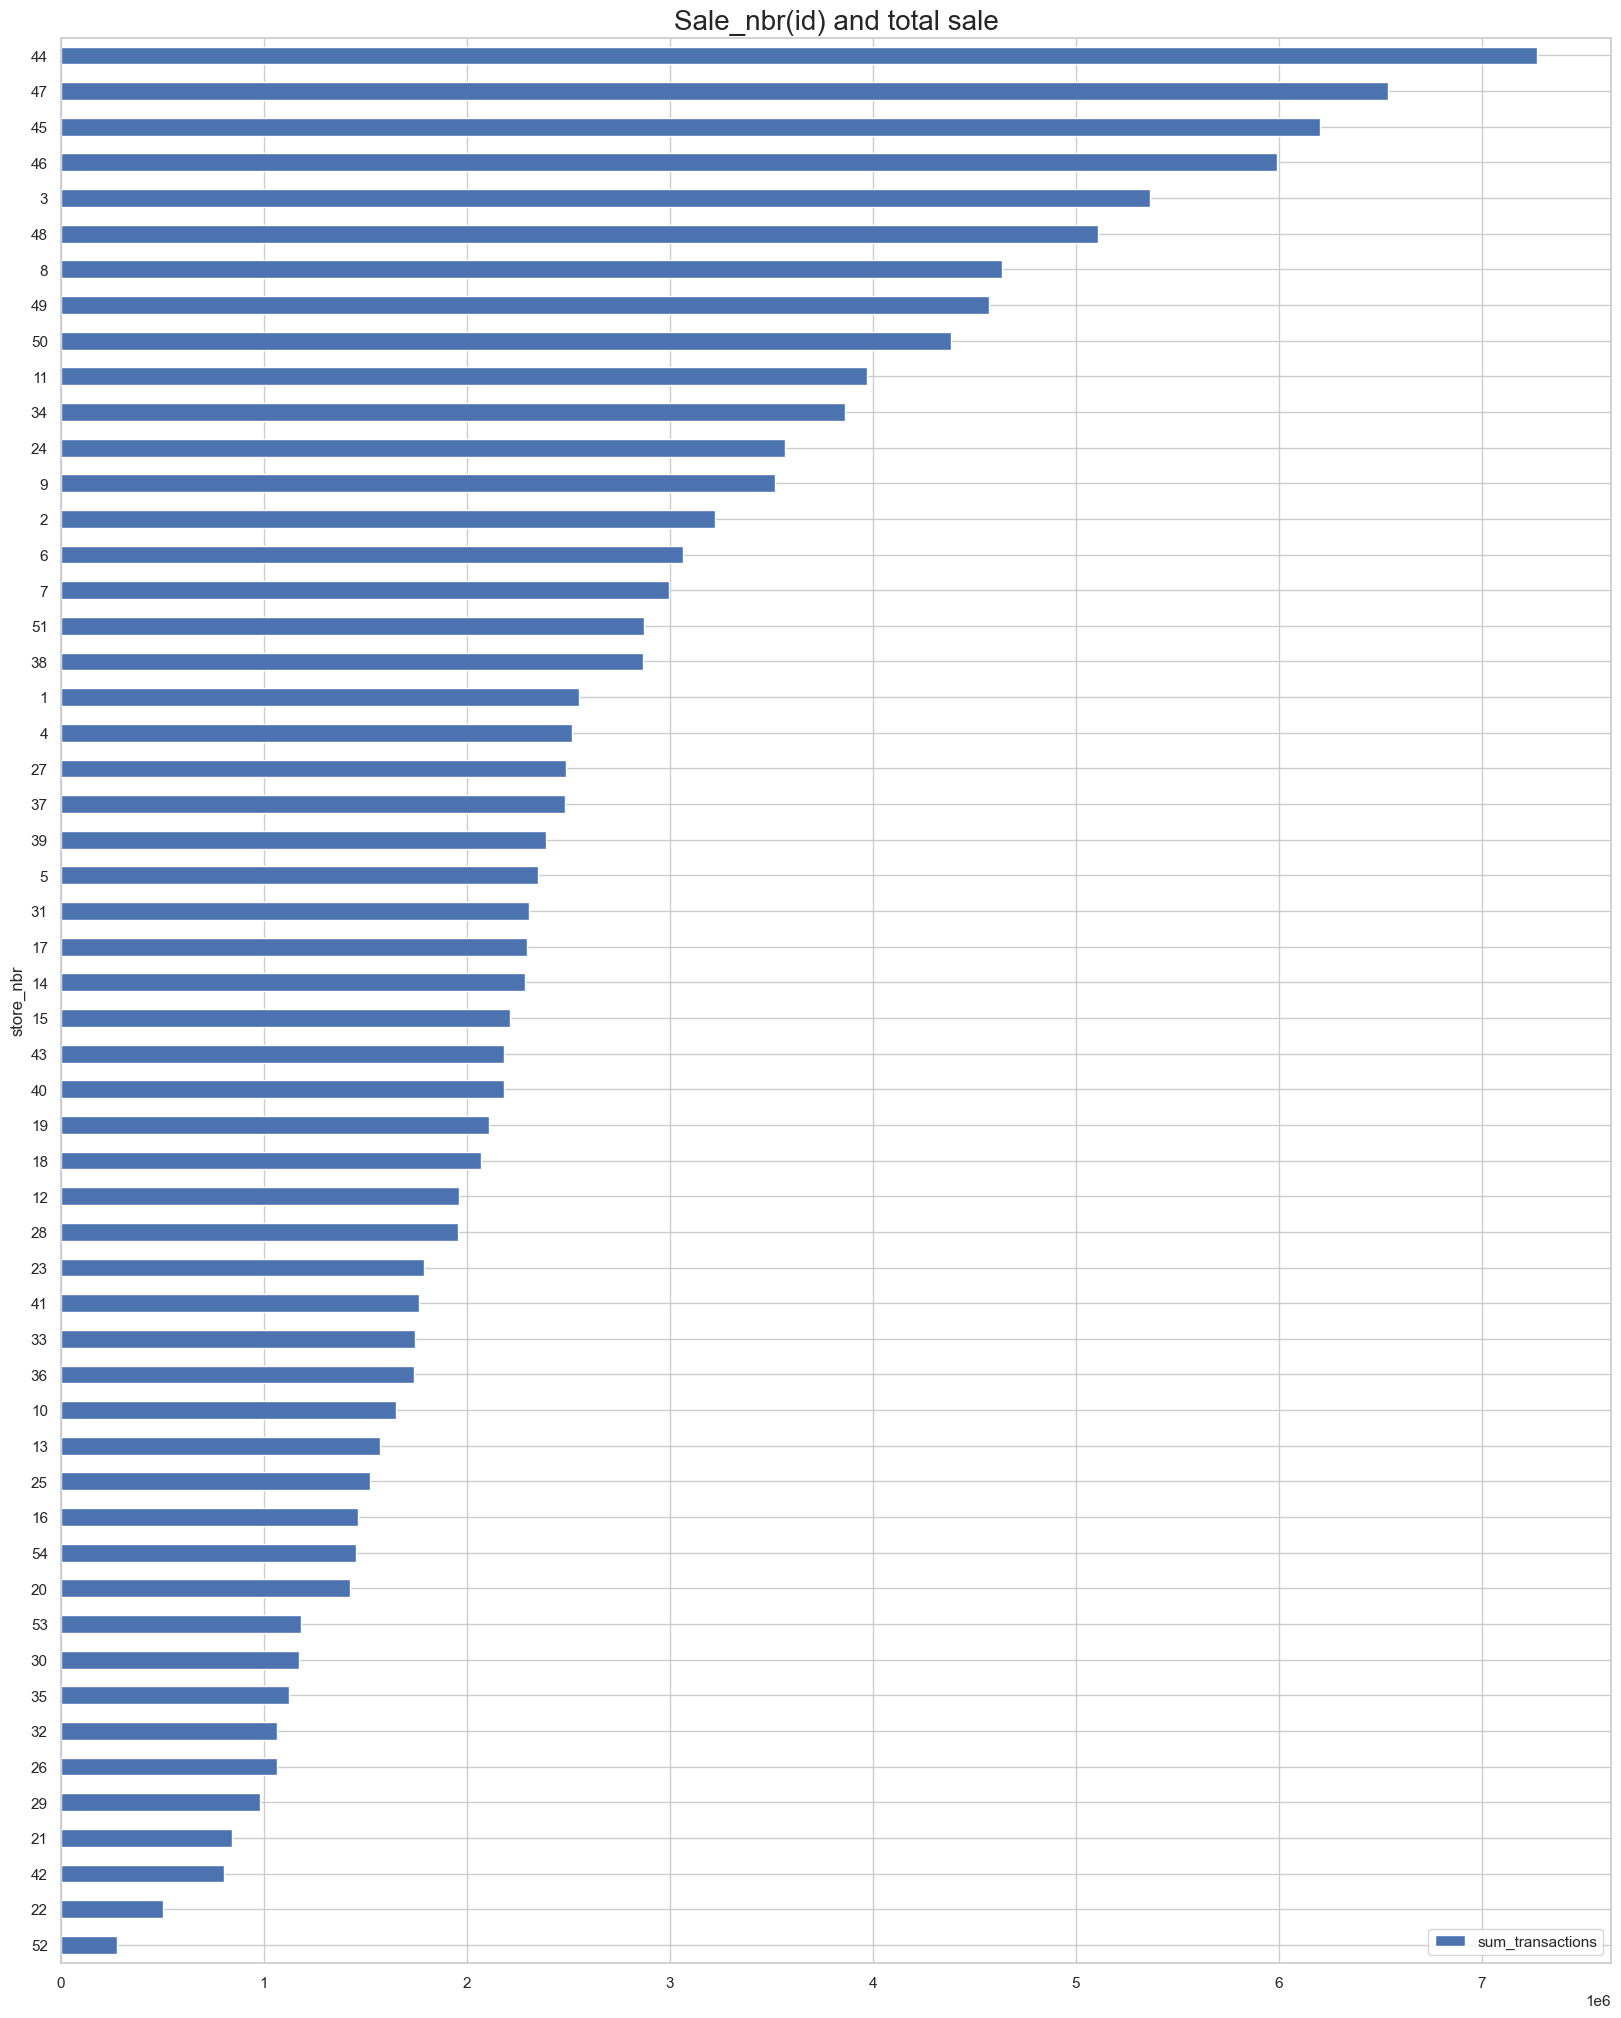

In [19]:
plt.figure(figsize=(8, 10))
result =df_transactions.groupby(['store_nbr']).agg(
             sum_transactions = ('transactions','sum'),
             ).sort_values(by='sum_transactions',ascending=True).plot.barh()

plt.title("Sale_nbr(id) and total sale",
          fontsize = 20)

plt.show()



store with id=44, 47,45,46, and 3 had the most transactions


Text(0.5, 1.0, 'Store_nbr(3) and transactions on time')

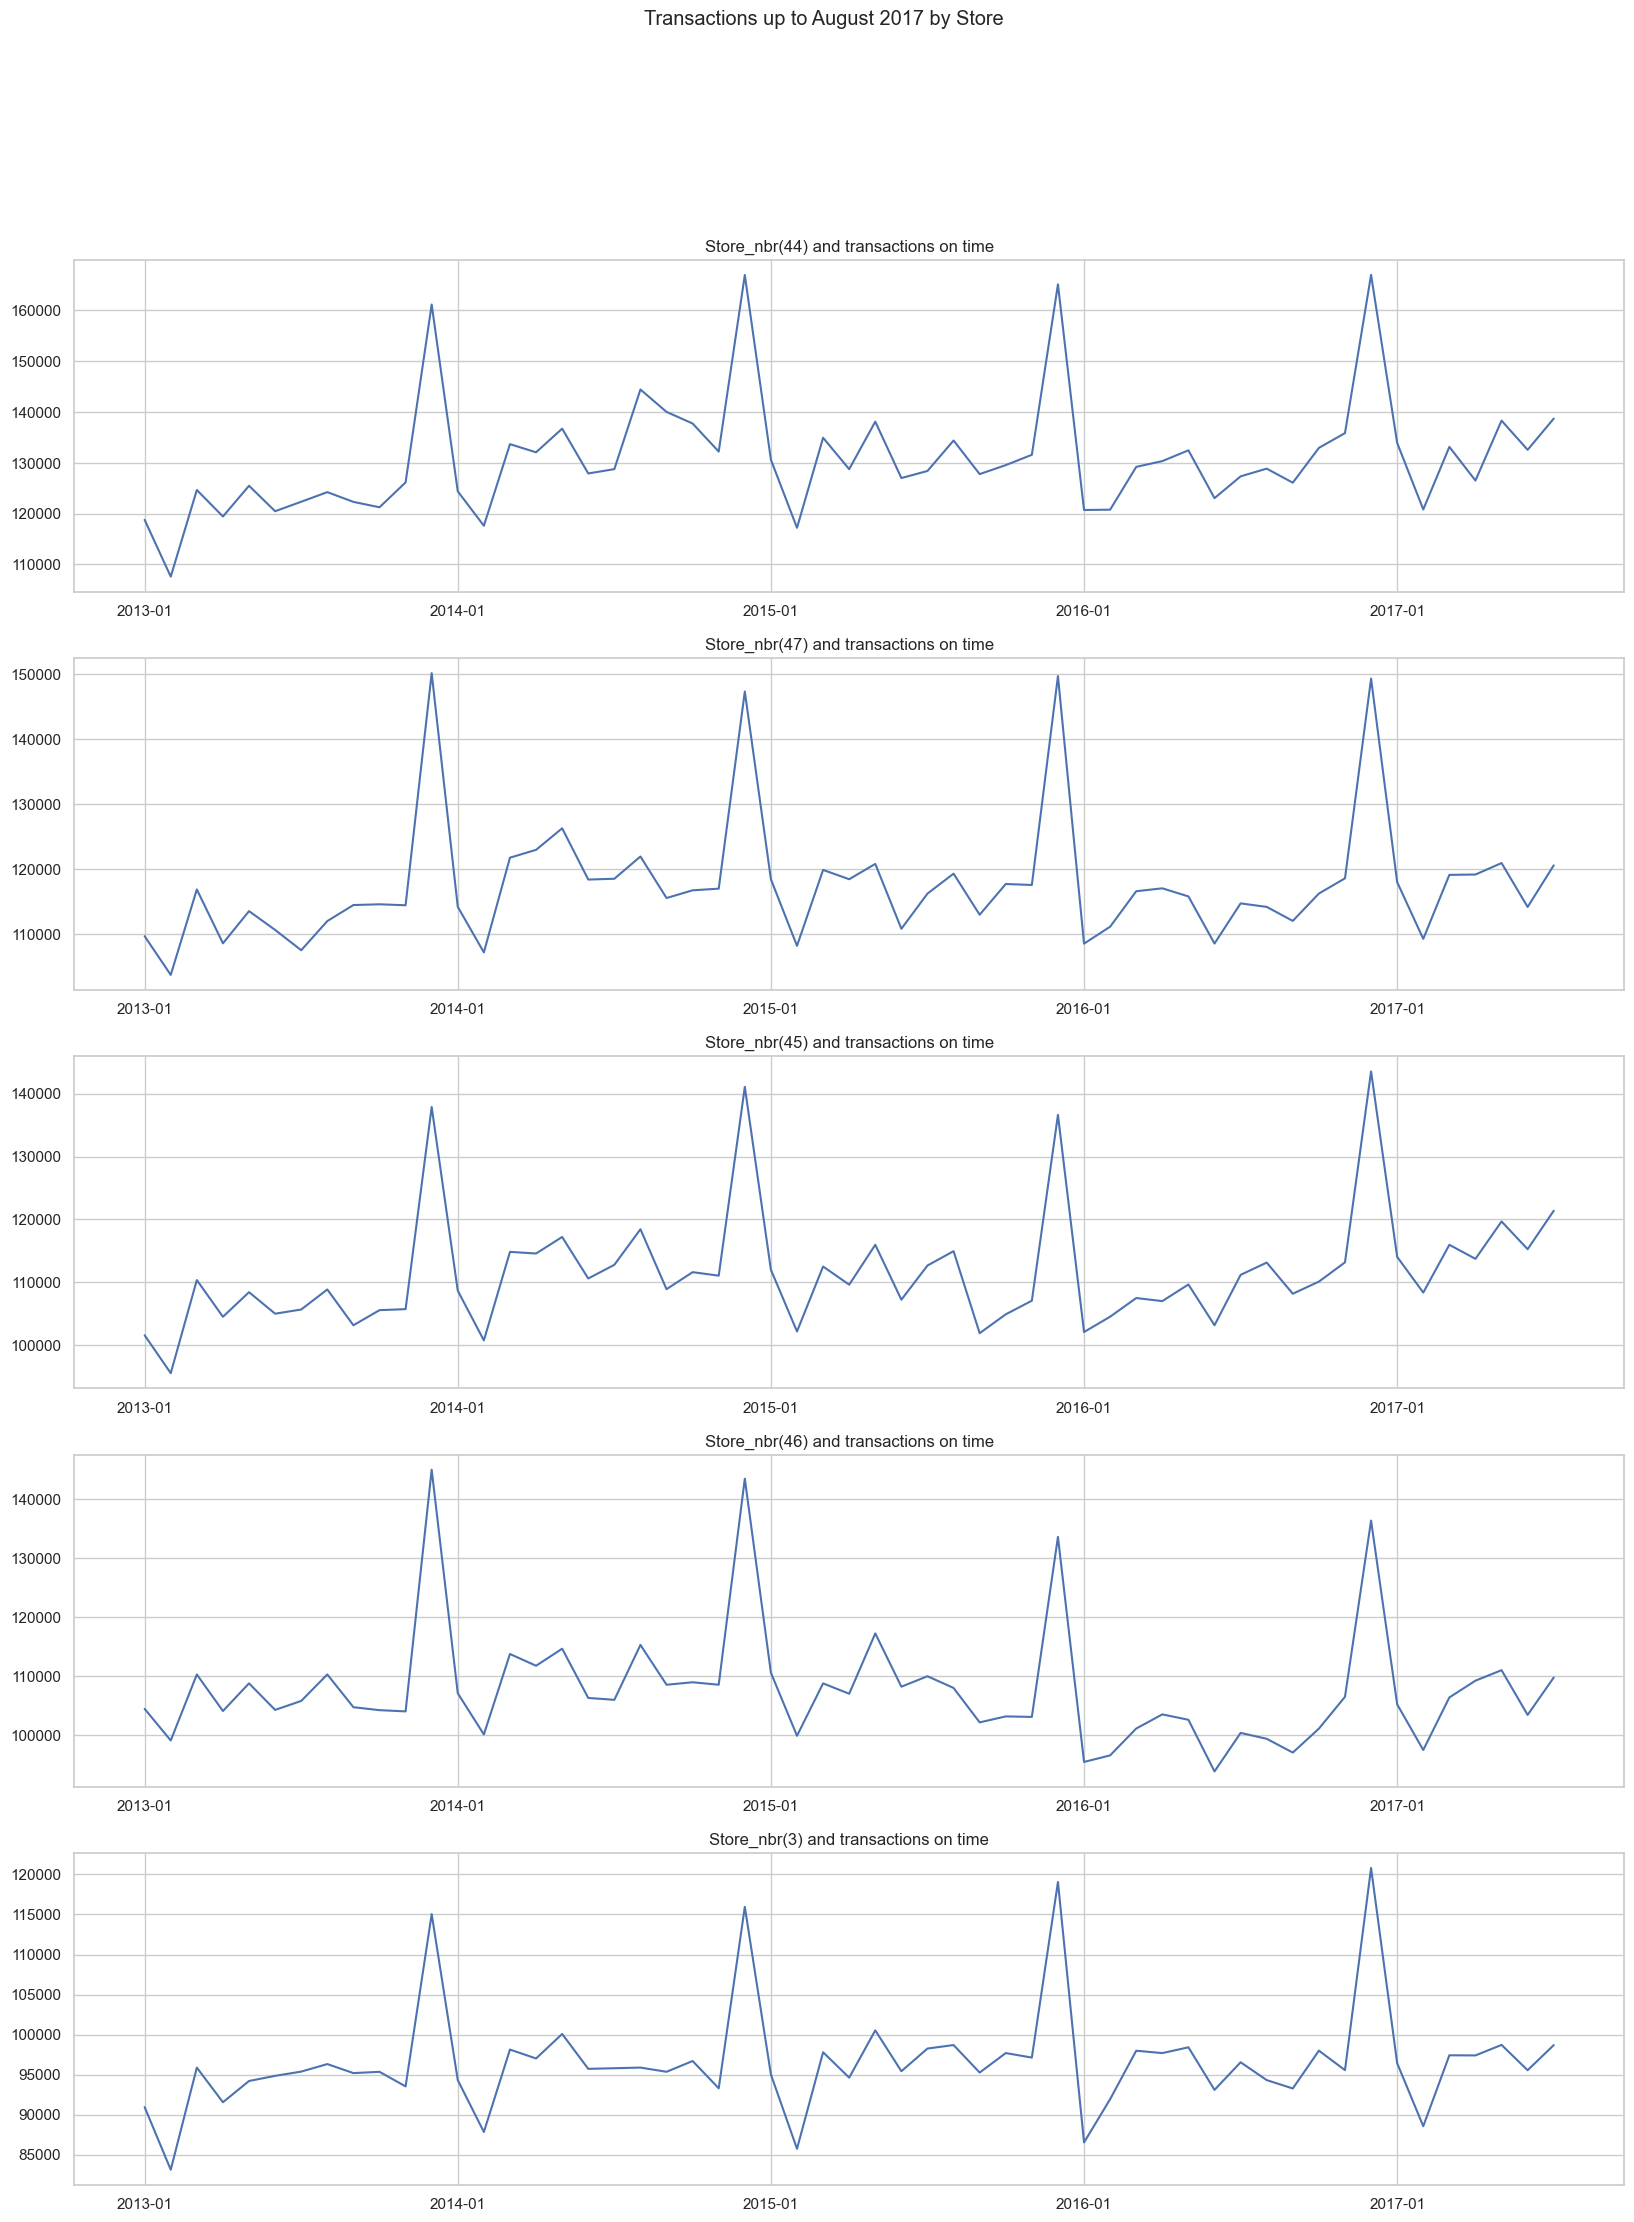

In [22]:
df_transactions_nbr44=df_transactions[df_transactions.store_nbr==44]

df_transactions_nbr47=df_transactions[df_transactions.store_nbr==47]
df_transactions_nbr45=df_transactions[df_transactions.store_nbr==45]
df_transactions_nbr46=df_transactions[df_transactions.store_nbr==46]
df_transactions_nbr3=df_transactions[df_transactions.store_nbr==3]
df_group44=df_transactions_nbr44.groupby(['year-month']).agg(
       transactions=('transactions', 'sum'),
       ).sort_values(by='year-month',ascending=True).reset_index()
df_group44.drop(df_group44.tail(1).index,inplace=True)

df_group47=df_transactions_nbr47.groupby(['year-month']).agg(
       transactions=('transactions', 'sum'),
       ).sort_values(by='year-month',ascending=True).reset_index()
df_group47.drop(df_group47.tail(1).index,inplace=True)

df_group45=df_transactions_nbr45.groupby(['year-month']).agg(
       transactions=('transactions', 'sum'),
       ).sort_values(by='year-month',ascending=True).reset_index()
df_group45.drop(df_group45.tail(1).index,inplace=True)

df_group46=df_transactions_nbr46.groupby(['year-month']).agg(
       transactions=('transactions', 'sum'),
       ).sort_values(by='year-month',ascending=True).reset_index()
df_group46.drop(df_group46.tail(1).index,inplace=True)


df_group3=df_transactions_nbr3.groupby(['year-month']).agg(
       transactions=('transactions', 'sum'),
       ).sort_values(by='year-month',ascending=True).reset_index()
df_group3.drop(df_group3.tail(1).index,inplace=True)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
fig.suptitle('Transactions up to August 2017 by Store')
ax1.plot(df_group44['year-month'], df_group44['transactions'])
ax2.plot(df_group47['year-month'], df_group47['transactions'])
ax3.plot(df_group45['year-month'], df_group45['transactions'])
ax4.plot(df_group46['year-month'], df_group46['transactions'])
ax5.plot(df_group3['year-month'], df_group3['transactions'])
xtick_loc = ['2013-01', '2014-01', '2015-01','2016-01','2017-01']
ax1.set_xticks(xtick_loc)
ax1.set_title('Store_nbr(44) and transactions on time')
ax2.set_xticks(xtick_loc)
ax2.set_title('Store_nbr(47) and transactions on time')

ax3.set_xticks(xtick_loc)
ax3.set_title('Store_nbr(45) and transactions on time')

ax4.set_xticks(xtick_loc)
ax4.set_title('Store_nbr(46) and transactions on time')

ax5.set_xticks(xtick_loc)
ax5.set_title('Store_nbr(3) and transactions on time')

There are more transactions during the end/begining of the year


  ## 4-oil  <a class="anchor"  id="4"></a>

In [23]:
df_oil.dropna(inplace=True)
df_oil["year"]=df_oil['date']. dt.year
df_oil["month"]=df_oil['date']. dt. month
#format YYYY-MM
df_oil["year-month"]=df_oil['date'].dt.strftime('%Y-%m')
df_oil.info()
# df_oil.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 1 to 1217
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1175 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
 2   year        1175 non-null   int64         
 3   month       1175 non-null   int64         
 4   year-month  1175 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 55.1+ KB


Text(0.5, 1.0, 'oil on time')

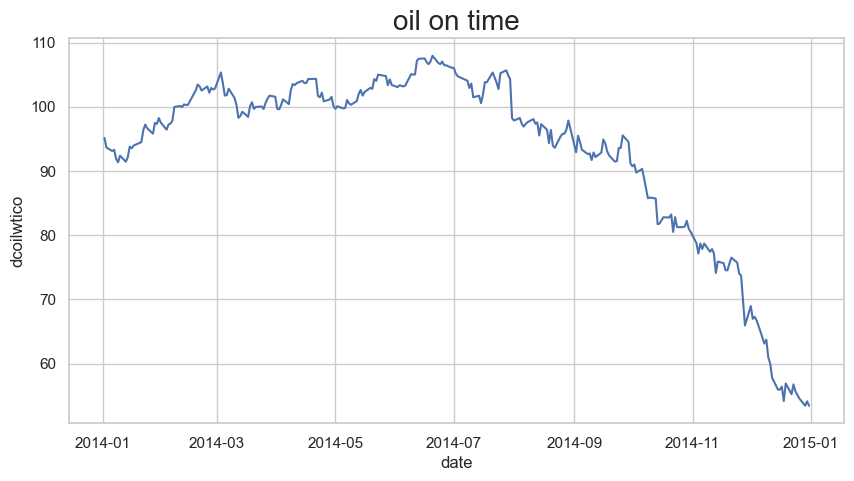

In [24]:
# sns.lineplot(data=df_transactions_nbr44[df_transactions_nbr44.year==2014],x = "date", y = "transactions")
plt.figure(figsize=(10, 5))

sns.lineplot(data=df_oil[df_oil.year==2014],x = "date", y = "dcoilwtico")
plt.title("oil on time",
          fontsize = 20)

/var/folders/gq/789ffg0j3_s7scj27n_mdkj40000gn/T/ipykernel_50489/3893112210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_nbr44["transactions_norm"]=normalize_max_min(df_transactions_nbr44["transactions"])
/var/folders/gq/789ffg0j3_s7scj27n_mdkj40000gn/T/ipykernel_50489/3893112210.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transactions_nbr47["transactions_norm"]=normalize_max_min(df_transactions_nbr47["transactions"])
/var/folders/gq/789ffg0j3_s7scj27n_mdkj40000gn/T/ipykern

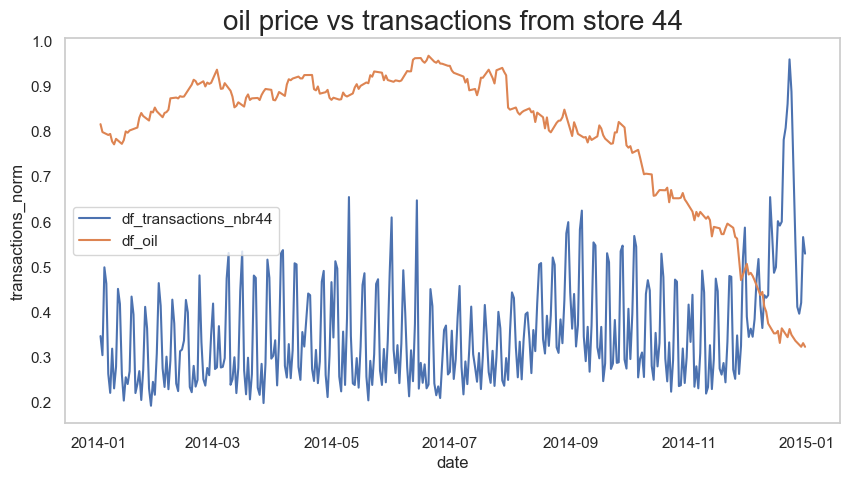

In [44]:
def normalize_max_min(col):
    a_min = col.min()
    a_max = col.max()
    norm_data = (col - a_min) / (a_max - a_min )
    return norm_data

plt.figure(figsize=(10, 5))
df_transactions_nbr44["transactions_norm"]=normalize_max_min(df_transactions_nbr44["transactions"])
df_transactions_nbr47["transactions_norm"]=normalize_max_min(df_transactions_nbr47["transactions"])
df_transactions_nbr45["transactions_norm"]=normalize_max_min(df_transactions_nbr45["transactions"])
df_transactions_nbr46["transactions_norm"]=normalize_max_min(df_transactions_nbr46["transactions"])
df_transactions_nbr3["transactions_norm"]=normalize_max_min(df_transactions_nbr3["transactions"])


df_oil["dcoilwtico_norm"]=normalize_max_min(df_oil["dcoilwtico"])

sns.lineplot(data=df_transactions_nbr44[df_transactions_nbr44.year==2014],x = "date",
             y = "transactions_norm", label='df_transactions_nbr44')

sns.lineplot(data=df_oil[df_oil.year==2014],x = "date", y = "dcoilwtico_norm" ,label='df_oil')
# sns.lineplot(data=df_transactions_nbr44 ,x=df.index,y = "a", label='line one')
# sns.lineplot(data=df ,x=df.index,y = "b", label='line one')
plt.title("oil price vs transactions from store 44",
          fontsize = 20)
plt.legend(loc="center left")

plt.show()


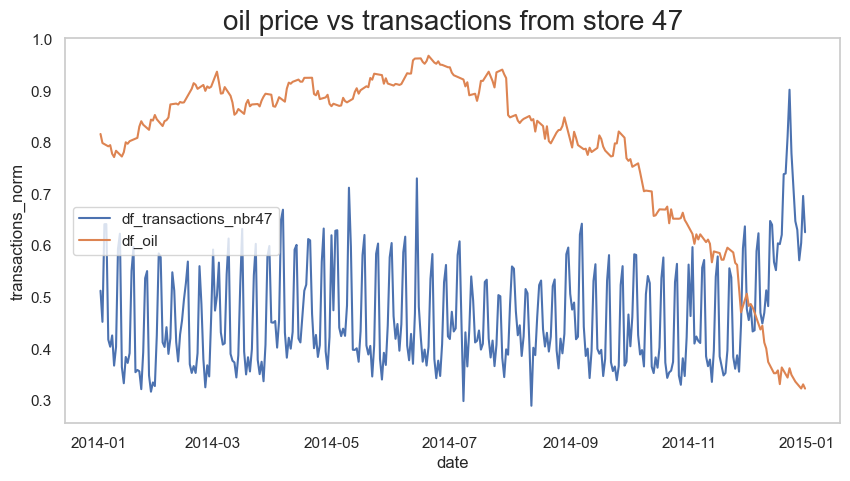

In [45]:
df_oil["dcoilwtico_norm"]=normalize_max_min(df_oil["dcoilwtico"])

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_transactions_nbr47[df_transactions_nbr47.year==2014],x = "date",
             y = "transactions_norm", label='df_transactions_nbr47')

sns.lineplot(data=df_oil[df_oil.year==2014],x = "date", y = "dcoilwtico_norm" ,label='df_oil')
# sns.lineplot(data=df_transactions_nbr44 ,x=df.index,y = "a", label='line one')
# sns.lineplot(data=df ,x=df.index,y = "b", label='line one')
plt.title("oil price vs transactions from store 47",
          fontsize = 20)
plt.legend(loc="center left")

plt.show()


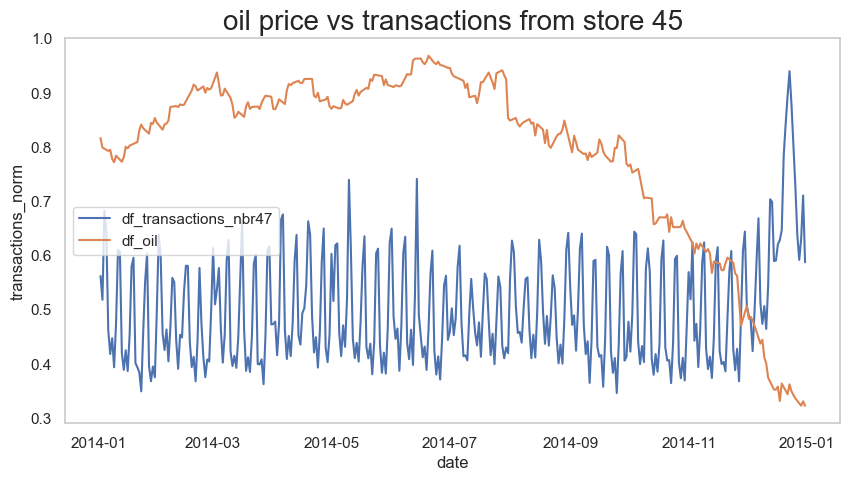

In [46]:
df_oil["dcoilwtico_norm"]=normalize_max_min(df_oil["dcoilwtico"])

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_transactions_nbr45[df_transactions_nbr45.year==2014],x = "date",
             y = "transactions_norm", label='df_transactions_nbr47')

sns.lineplot(data=df_oil[df_oil.year==2014],x = "date", y = "dcoilwtico_norm" ,label='df_oil')
# sns.lineplot(data=df_transactions_nbr44 ,x=df.index,y = "a", label='line one')
# sns.lineplot(data=df ,x=df.index,y = "b", label='line one')
plt.title("oil price vs transactions from store 45",
          fontsize = 20)
plt.legend(loc="center left")

plt.show()


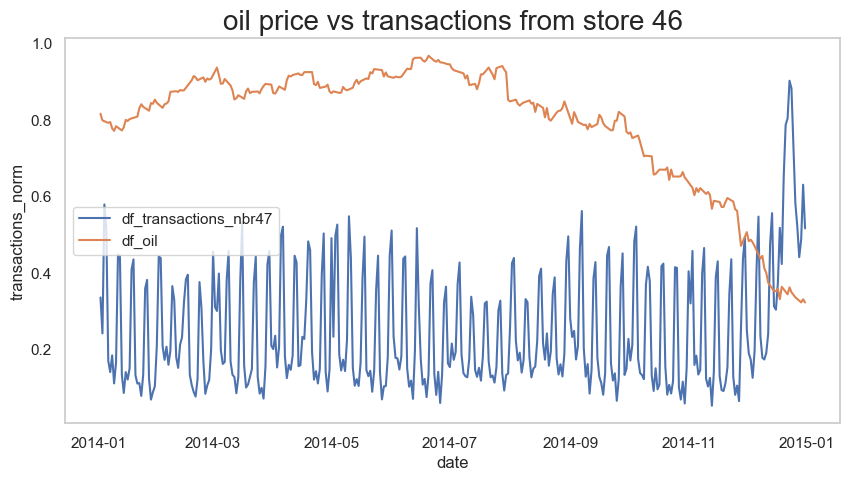

In [47]:
df_oil["dcoilwtico_norm"]=normalize_max_min(df_oil["dcoilwtico"])

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_transactions_nbr46[df_transactions_nbr46.year==2014],x = "date",
             y = "transactions_norm", label='df_transactions_nbr47')

sns.lineplot(data=df_oil[df_oil.year==2014],x = "date", y = "dcoilwtico_norm" ,label='df_oil')
# sns.lineplot(data=df_transactions_nbr44 ,x=df.index,y = "a", label='line one')
# sns.lineplot(data=df ,x=df.index,y = "b", label='line one')
plt.title("oil price vs transactions from store 46",
          fontsize = 20)
plt.legend(loc="center left")

plt.show()


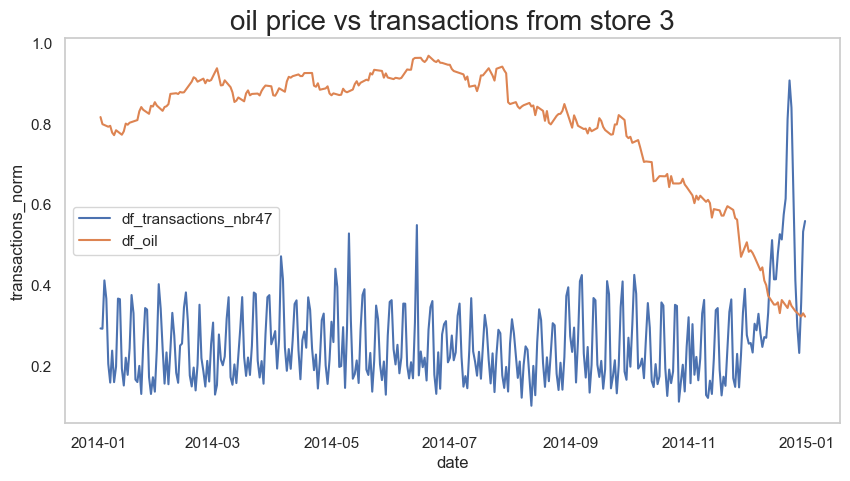

In [48]:
df_oil["dcoilwtico_norm"]=normalize_max_min(df_oil["dcoilwtico"])

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_transactions_nbr3[df_transactions_nbr3.year==2014],x = "date",
             y = "transactions_norm", label='df_transactions_nbr47')

sns.lineplot(data=df_oil[df_oil.year==2014],x = "date", y = "dcoilwtico_norm" ,label='df_oil')
# sns.lineplot(data=df_transactions_nbr44 ,x=df.index,y = "a", label='line one')
# sns.lineplot(data=df ,x=df.index,y = "b", label='line one')
plt.title("oil price vs transactions from store 3",
          fontsize = 20)
plt.legend(loc="center left")

plt.show()


all top stores (44, 47,45,46,3) show a trend of increased transactions when the daily oil price dropped

  ## 5-holidays_events  <a class="anchor"  id="5"></a>

In [27]:
df_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


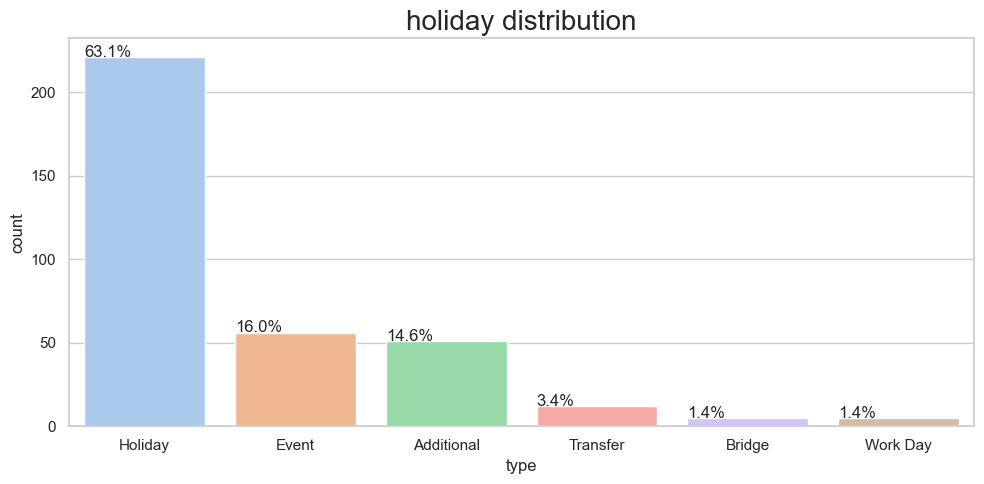

In [56]:
sns.set_theme(style="whitegrid")
colName="type"
val = df_holiday[colName].value_counts().sort_values(ascending=False)
f, axs = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.countplot(df_holiday, x=colName # or y
                   , palette="pastel"
                   , order=val.index
                   ,ax=axs
                   )

summ = val.sum()

title = val.index
lbls = [f'{p[0] * 100 / summ:.1f}%' for p in zip(val)]


# hor label
for p, label in zip(ax.patches, lbls):
    ax.annotate(label, (p.get_x(), p.get_height() + 0.15))
    
plt.title("holiday distribution",
          fontsize = 20)    

plt.tight_layout()


  ## train  <a class="anchor"  id="6"></a>

In [29]:
df_train["year"]=df_train['date']. dt.year
df_train["month"]=df_train['date']. dt. month
#format YYYY-MM
df_train["year-month"]=df_train['date'].dt.strftime('%Y-%m')
df_train['month_name'] = df_train['date'].dt.strftime("%b") #Jan
df_train['weekday'] = df_train['date'].dt.strftime("%a") #Wed
df_train.info()
# df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6274812 entries, 0 to 6274811
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   item_nbr     int64         
 4   unit_sales   float64       
 5   onpromotion  object        
 6   year         int64         
 7   month        int64         
 8   year-month   object        
 9   month_name   object        
 10  weekday      object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 526.6+ MB


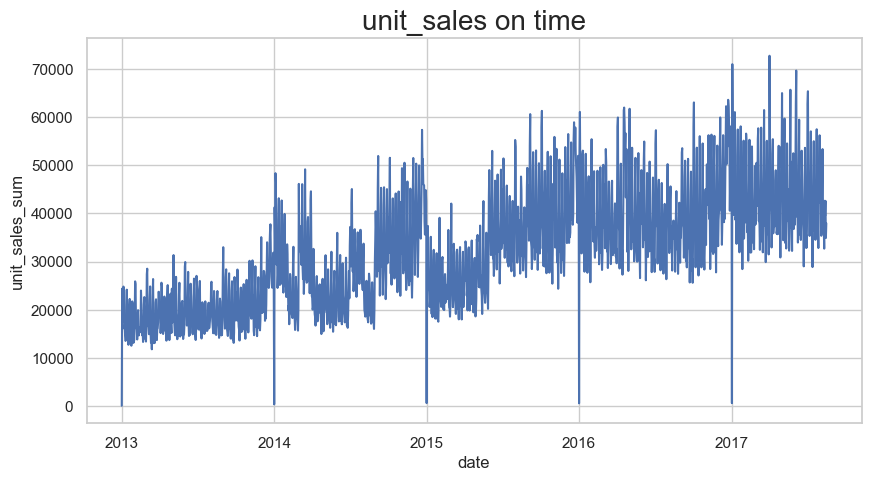

In [30]:
df_group=df_train.groupby(['date']).agg(
       unit_sales_sum=('unit_sales', 'sum'),
       ).sort_values(by='date',ascending=True).reset_index()


plt.figure(figsize=(10, 5))


sns.lineplot(data=df_group, x='date',
                 y='unit_sales_sum')


plt.title("unit_sales on time",
          fontsize = 20)
plt.show()


The sales trend is positive over time



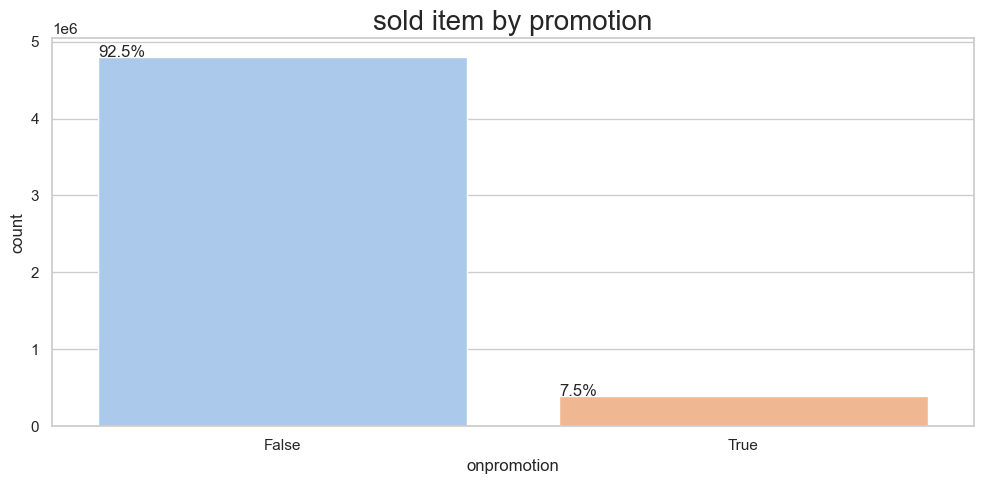

In [57]:
#chart setting
colName= "onpromotion"
df_cahrt=df_train

sns.set_theme(style="whitegrid")
val = df_cahrt[colName].value_counts().sort_values(ascending=False)
# val=df[colName].value_counts().sort_index(ascending=True)
plt.figure(figsize=(10, 5))
ax = sns.countplot(df_cahrt, x=colName 
                   , palette="pastel"
                   # , stat="percent"
                   , order=val.index
                   )

summ = val.sum()

title = val.index
lbls = [f'{p[0] * 100 / summ:.1f}%' for p in zip(val)]

# vetical label x=col
for p, label in zip(ax.patches, lbls):
    ax.annotate(label, (p.get_x(), p.get_height() + 0.15))
plt.title("sold item by promotion",
          fontsize = 20)
plt.tight_layout()
plt.show()



7.5 % of sales are on promotion



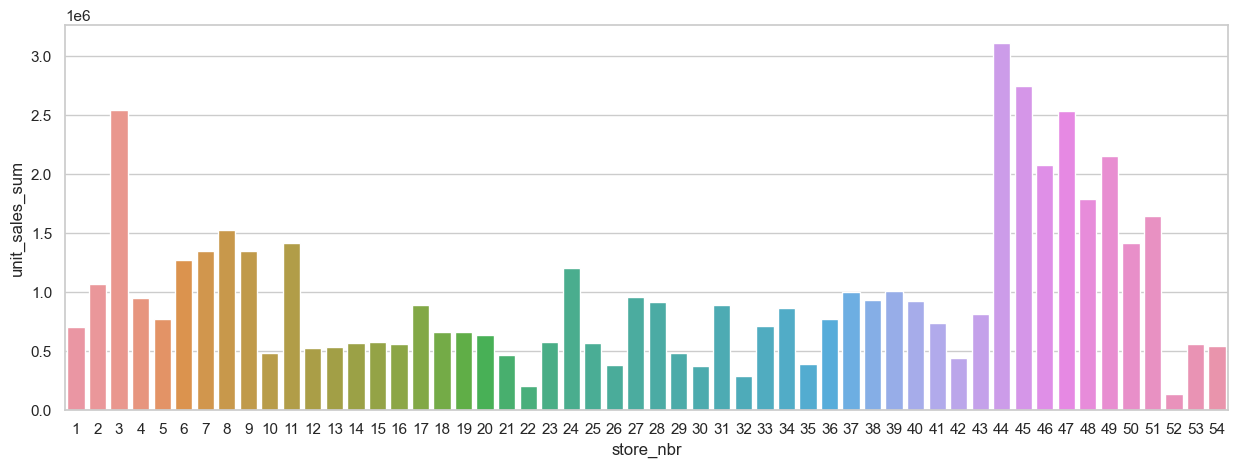

In [34]:
df_group=df_train.groupby(['store_nbr']).agg(
       unit_sales_sum=('unit_sales', 'sum'),
       ).sort_values(by='unit_sales_sum',ascending=False).reset_index()

plt.figure(figsize=(15, 5))
ax = sns.barplot(data=df_group, x='store_nbr',
                 y='unit_sales_sum')
plt.show()



store_nbr=44, 45, 47, 3, and 46 has the most amount of sales

